In [2]:
%load_ext autoreload
%autoreload 2

## Test pipeline on one instance


In [3]:
from pathlib import Path
import librosa
import IPython.display as ipd
from pitch_estimator import PitchEstimator
from preprocessors import Preprocessor
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [39]:
data_path = Path("gamelan_music_dataset")
targets_first = data_path / "first ensemble/orchestra/target"
audio_file_path = targets_first / "demung/001.wav"

pitch_est = PitchEstimator()
pp = Preprocessor()

# Display input audio
y, sr = librosa.load(audio_file_path, duration=10)
print('Input audio:')
display(ipd.Audio(y, rate=sr))

# Using median filtering to divide harmonic from percussive component
spectrogram = pp.compute_spectrogram(y)
harmonic, percussive = pp.apply_median_filtering(spectrogram)


# Reconstruct harmonic component audio and display it
reconstructed_audio_griffinlim = librosa.griffinlim(harmonic)
reconstructed_audio_griffinlim_percussive = librosa.griffinlim(percussive)

# https://librosa.org/doc/main/generated/librosa.griffinlim.html
print('Harmonic component reconstructed with griffin and lim algorithm:')
display(ipd.Audio(reconstructed_audio_griffinlim, rate=sr))


Input audio:


Harmonic component reconstructed with griffin and lim algorithm:


In [40]:
onsets = librosa.onset.onset_detect(y=reconstructed_audio_griffinlim_percussive, units="time")

In [41]:
onsets

array([0.65015873, 1.50929705, 2.36843537, 3.2275737 , 4.08671202,
       4.94585034, 5.80498866, 6.64090703, 7.52326531, 8.35918367,
       9.218322  ])

In [15]:
time, frequency, confidence, activation = pitch_est.estimate_crepe(reconstructed_audio_griffinlim, sr)


32/32 [==============================] - 17s 511ms/step


In [38]:
time

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

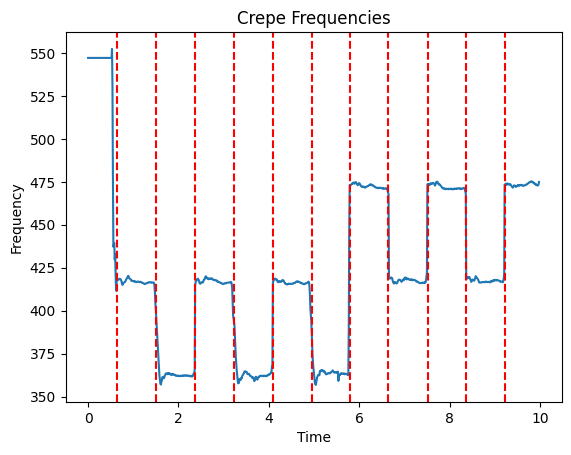

In [44]:
# Plot the interpolated frequencies
plt.plot(time, frequency)
plt.xlabel('Time') 
plt.ylabel('Frequency')
plt.title('Crepe Frequencies')

for t in onsets:
    plt.axvline(x=round(t, 2), color='r', linestyle='--', label=f'Time {t}')

plt.show()